#### Due to the outcome of the first integration which did not yield an acceptable result, here I want to try to apply the same normalsiation process to both kamath and midmap in order to exclude this as the couse of the non-integration

In [48]:
#integrated_adata.write('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/integrated_adata.h5ad')

In [58]:
#midmap.write('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/midmap_integrated.h5ad')

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import scvi 
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from harmony import harmonize
from scipy.sparse import issparse

output_dir = '/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/deliverables/'
sc.settings.figdir = output_dir

sc.settings.verbosity = 3
sc.settings.n_jobs= 10

sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = '/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/deliverables'

scvi.settings.seed = 0

pd.set_option('display.max_columns', None)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [ ]:
midmap = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/for_next_person/data/scvi_model_final/harmonized_base.h5ad')

In [ ]:
kamath = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/filtered_adata_neuron_cellbender.h5ad')

In [ ]:
integrated_adata = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/integrated_adata.h5ad')

In [5]:
midmap.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 522220 × 45433
    obs: 'species', 'gender', 'age', 'instrument', 'technology', 'atlas', 'sample', 'batch_1', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm', 'original_Library', 'original_Brain_Region', 'original_Level_1_cell_type', 'original_Level_2_cell_type', 'original_cellclass_lvl1', 'original_subclass_lvl3_1', 'original_cellclass_lvl1_n', 'original_lineage', 'original_subclass_lvl2', 'original_celltype_lvl3', 'donor', 'original_supercluster_term', 'original_cluster_id', 'original_subcluster_id', 'original_celltype', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lowest_res', 'cell_type_low_res', 'cell_type_med_res', 'cell_type_high_res', 'h

In [27]:
# Summary
for column in midmap.obs.columns:
    if midmap.obs[column].dtype.name == 'category' or midmap.obs[column].dtype.name == 'object':
        print(f"Summary of {column}:")
        print(midmap.obs[column].value_counts())
        print("\n" + "="*50 + "\n")


Summary of species:
Homo sapien    522220
Name: species, dtype: int64


Summary of gender:
male      378526
           85044
female     58650
Name: gender, dtype: int64


Summary of age:
            152511
50 years    103238
42 years    103167
29 years     81118
93 years     25568
90            6375
72 years      6149
84            5752
77 years      5145
66            4988
93            4789
88            4353
77            3238
89 years      3224
70            3091
56            2297
73 years      2126
55            1930
59            1896
82 years       676
84 years       537
91 years        52
Name: age, dtype: int64


Summary of instrument:
                         416044
Illumina NovaSeq 6000     96962
Illumina HiSeq 4000        9214
Name: instrument, dtype: int64


Summary of technology:
          416044
10x_v2     67467
10x_v3     38709
Name: technology, dtype: int64


Summary of atlas:
siletti    287523
altena      85044
welch       67467
wang        43477
smajic      29495
ag

#### Adding metadata to match the midmap structure

In [16]:
midmap.raw.var_names

Index(['5S_rRNA-1', '5S_rRNA-3', '5S_rRNA-5', '5S_rRNA-8', '7SK-4', 'A1BG',
       'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=45433)

In [19]:
midmap.var_names

Index(['5S_rRNA-1', '5S_rRNA-3', '5S_rRNA-5', '5S_rRNA-8', '7SK-4', 'A1BG',
       'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=45433)

In [15]:
kamath.raw.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=60656)

### Since midmap.var and midmap.raw.var have the same number of genes, I want to check wheather the data were actually different and that midmap.raw.var was not just a copy of midmap.var


In [6]:
raw_vs_normalized = np.array_equal(midmap.raw.X.A, midmap.X.A)
raw_vs_normalized

False

In [85]:
if midmap.raw is not None:
    # Convert to dense matrices if they are sparse
    raw_data = midmap.raw.X.A if isinstance(midmap.raw.X, np.matrix) else midmap.raw.X
    normalized_data = midmap.X.A if isinstance(midmap.X, np.matrix) else midmap.X

    # Ensure the 'atlas' column exists in obs
    if 'atlas' in midmap.obs.columns:
        # Loop over unique values of 'atlas'
        for atlas in midmap.obs['atlas'].unique():
            # Get the indices where 'atlas' matches the current group
            indices = midmap.obs['atlas'] == atlas
            
            # Select the corresponding rows for raw and normalized data
            raw_data_atlas = raw_data[indices]
            normalized_data_atlas = normalized_data[indices]
            
            print(f"\nStatistics for atlas group: {atlas}")
            
            # Print min, max, and mean for raw counts
            print("Raw counts statistics:")
            print(f"Min: {raw_data_atlas.min()}")
            print(f"Max: {raw_data_atlas.max()}")
            print(f"Mean: {raw_data_atlas.mean()}")

            # Print min, max, and mean for normalized counts
            print("\nNormalized counts statistics:")
            print(f"Min: {normalized_data_atlas.min()}")
            print(f"Max: {normalized_data_atlas.max()}")
            print(f"Mean: {normalized_data_atlas.mean()}")

    else:
        print("No 'atlas' column found in midmap.obs.")
else:
    print("No raw counts available in midmap.")



Statistics for atlas group: agarwal
Raw counts statistics:
Min: 0
Max: 5827
Mean: 0.050650707371695934

Normalized counts statistics:
Min: 0.0
Max: 8.241434097290039
Mean: 0.052248064428567886

Statistics for atlas group: altena
Raw counts statistics:
Min: 0
Max: 9635
Mean: 0.2092152428334367

Normalized counts statistics:
Min: 0.0
Max: 8.044528007507324
Mean: 0.07779788225889206

Statistics for atlas group: siletti
Raw counts statistics:
Min: 0
Max: 13439
Mean: 0.242529486085537

Normalized counts statistics:
Min: 0.0
Max: 8.210409164428711
Mean: 0.07968312501907349

Statistics for atlas group: smajic
Raw counts statistics:
Min: 0
Max: 5207
Mean: 0.15137919988416113

Normalized counts statistics:
Min: 0.0
Max: 7.6396870613098145
Mean: 0.07154688984155655

Statistics for atlas group: welch
Raw counts statistics:
Min: 0
Max: 1417
Mean: 0.036536254494233915

Normalized counts statistics:
Min: 0.0
Max: 8.130115509033203
Mean: 0.04980524629354477

Statistics for atlas group: wang
Raw coun

In [89]:
if kamath.raw is not None:
    # Convert to dense matrices if they are sparse
    raw_data = kamath.raw.X.A if isinstance(kamath.raw.X, np.matrix) else kamath.raw.X
    normalized_data = kamath.X.A if isinstance(kamath.X, np.matrix) else kamath.X

    # Print min, max, and mean for raw counts
    print("Raw counts statistics for kamath:")
    print(f"Min: {raw_data.min()}")
    print(f"Max: {raw_data.max()}")
    print(f"Mean: {raw_data.mean()}")

    # Print min, max, and mean for normalized counts
    print("\nNormalized counts statistics for kamath:")
    print(f"Min: {normalized_data.min()}")
    print(f"Max: {normalized_data.max()}")
    print(f"Mean: {normalized_data.mean()}")
else:
    print("No raw counts available in kamath.")


Raw counts statistics for kamath:
Min: 0
Max: 22598
Mean: 0.4127174839964393

Normalized counts statistics for kamath:
Min: -1.903005838394165
Max: 10.0
Mean: -0.0011782583314925432


### From here i want to try to retrieve the raw data and process both kamath and midmap in the same way during the preprocessing, normalisation and filtering

In [4]:
current_genes = kamath.var_names
raw_subset = kamath.raw[:, current_genes].X.copy()
kamath.X = raw_subset

In [5]:
midmap.X = midmap.raw.X.copy()

In [6]:
# Normalize total counts to 10,000 per cell
sc.pp.normalize_total(kamath, target_sum=1e4)
sc.pp.normalize_total(midmap, target_sum=1e4)

normalizing counts per cell
    finished (0:00:01)
normalizing counts per cell
    finished (0:01:40)


In [7]:
sc.pp.highly_variable_genes(kamath, flavor='cell_ranger', n_top_genes=2500)
sc.pp.highly_variable_genes(midmap, flavor='cell_ranger', n_top_genes=2500)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
print(f"Kamath: {sum(kamath.var['highly_variable'])} highly variable genes")
print(f"Midmap: {sum(midmap.var['highly_variable'])} highly variable genes")

Kamath: 2500 highly variable genes
Midmap: 2500 highly variable genes


In [40]:
# Subset the data to highly variable genes
kamath = kamath[:, kamath.var['highly_variable']].copy()
midmap = midmap[:, midmap.var['highly_variable']].copy()

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
# Scale the data to unit variance and zero mean
sc.pp.scale(kamath, max_value=10)
sc.pp.scale(midmap, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [24]:
print(f"Kamath dataset shape after preprocessing: {kamath.shape}")
print(f"Midmap dataset shape after preprocessing: {midmap.shape}")

Kamath dataset shape after preprocessing: (162278, 5004)
Midmap dataset shape after preprocessing: (522220, 45433)


In [16]:
kamath.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 162278 × 5004
    obs: 'batch', 'sample_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'percent_mito', 'high_mito', 'doublet_score', 'predicted_doublet', 'leiden', 'neuron_score', 'oligodendrocyte_score', 'OPCs_score', 'microglia_score', 'pericyte_score', 'astrocyte_score', 'highest_score_class', 'harmonized_lowest', 'Glutamatergic_score', 'GABAergic_score', 'Dopaminegic_score', 'resolution_neurotransmitter', 'resolution_neurotransmitter_combinatorial', 'Run', 'gender', 'submitted_subject_id', 'study_disease', 'histological_type', 'matched_names', 'matc

### Modifying some col names so that the concatenation of kamath and midmap is smoother

In [10]:
# Add 'instrument', 'species', and 'atlas' columns
kamath.obs = kamath.obs.assign(instrument = 'Illumina NovaSeq 6000', 
                               species = 'Homo sapien', 
                               atlas = 'kamath')

kamath.obs.rename(columns={'celltype': 'harmonized_lowest'}, inplace=True)
kamath.obs.rename(columns={'doublet_scores': 'doublet_score'}, inplace=True)
kamath.obs.rename(columns={'sex': 'gender'}, inplace=True)
kamath.obs['harmonized_lowest'].replace('neuron', 'Neuron', inplace=True)

In [12]:
common_genes = kamath.var_names.intersection(midmap.var_names)

##### Subsetting both kamath and midmap genes based on the common genes retrieved by the intersection

In [13]:
kamath = kamath[:, common_genes].copy()

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
midmap = midmap[:, common_genes].copy()

In [15]:
# Concatenating the two datasets
integrated_adata = kamath.concatenate(midmap, index_unique=None)

<ipython-input-15-f825786ba410>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  integrated_adata = kamath.concatenate(midmap, index_unique=None)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_na

In [17]:
integrated_adata.obs_names_make_unique()


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['ACTGTCCCAGGGTCTC-1-1', 'GTTGTCCCAAGAAACT-1-1', 'CAATTTCCAATGTTGC-1-1', 'CAATTTCCATTATGCG-1-1', 'CTTCTCTCAACTGATC-1-1']
  warnings.warn(


In [18]:
integrated_adata.obs['harmonized_lowest'].value_counts()

Neuron             319522
Oligodendrocyte    230390
Microglia           41173
Astrocyte           39179
OPC                 30575
unknown             14457
Endothelial          5794
Miscellaneous        2377
Ependymal             563
Pericyte              468
Name: harmonized_lowest, dtype: int64

### Making integrated_adata.raw.X  == to integrated_adata.X

In [23]:
common_genes = integrated_adata.var_names.intersection(integrated_adata.raw.var_names)

In [24]:
integrated_adata = integrated_adata[:, common_genes].copy()
integrated_adata.raw = integrated_adata.copy()
# Store the raw counts in a new layer named 'counts'
integrated_adata.layers["counts"] = integrated_adata.raw.X.copy()

##### Adjusting metadata format in order to continue with the analysis

In [57]:
for column in integrated_adata.obs.columns:
    col_data = integrated_adata.obs[column]
    
    # Determine if column is numerical, categorical, string, and if it contains NaN values
    dtype = col_data.dtype
    is_categorical = pd.api.types.is_categorical_dtype(col_data)
    is_numeric = pd.api.types.is_numeric_dtype(col_data)
    is_string = pd.api.types.is_string_dtype(col_data)
    has_nan = col_data.isna().any()
    
    print(f"Column: {column}")
    print(f"Data Type: {dtype}")
    if is_categorical:
        print("Column Type: Categorical")
        print(f"Categories: {col_data.cat.categories}")
    elif is_numeric:
        print("Column Type: Numerical")
    elif is_string:
        print("Column Type: String")
    
    print(f"Contains NaN values: {has_nan}")
    print("="*50)


Column: batch
Data Type: object
Column Type: String
Contains NaN values: False
Column: sample_name
Data Type: object
Column Type: String
Contains NaN values: False
Column: n_genes_by_counts
Data Type: object
Column Type: String
Contains NaN values: False
Column: log1p_n_genes_by_counts
Data Type: object
Column Type: String
Contains NaN values: False
Column: total_counts
Data Type: object
Column Type: String
Contains NaN values: False
Column: log1p_total_counts
Data Type: object
Column Type: String
Contains NaN values: False
Column: pct_counts_in_top_50_genes
Data Type: object
Column Type: String
Contains NaN values: False
Column: pct_counts_in_top_100_genes
Data Type: object
Column Type: String
Contains NaN values: False
Column: pct_counts_in_top_200_genes
Data Type: object
Column Type: String
Contains NaN values: False
Column: pct_counts_in_top_500_genes
Data Type: object
Column Type: String
Contains NaN values: False
Column: n_counts
Data Type: object
Column Type: String
Contains NaN

Column: original_cluster_id
Data Type: object
Column Type: String
Contains NaN values: False
Column: original_subcluster_id
Data Type: object
Column Type: String
Contains NaN values: False
Column: original_celltype
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_lvl1
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_lvl2
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_lvl3
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_lowest_res
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_low_res
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_med_res
Data Type: object
Column Type: String
Contains NaN values: False
Column: cell_type_high_res
Data Type: object
Column Type: String
Contains NaN values: False
Column: harmonized_lowest_res
Data Type: object
Column Type: String
Contains NaN values:

In [26]:
# Convert specified .obs columns to numeric
obs_columns = [
    'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 
    'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
    'pct_counts_in_top_500_genes', 'n_counts', 'total_counts_mt', 'log1p_total_counts_mt', 
    'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 
    'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'percent_mito', 'doublet_score', 
    'predicted_doublet', 'neuron_score', 'oligodendrocyte_score', 'OPCs_score', 'microglia_score', 
    'pericyte_score', 'astrocyte_score', 'highest_score_class', 
    'Glutamatergic_score', 'GABAergic_score', 'Dopaminegic_score', 'n_genes', 'total_counts_mito', 'total_counts_norm'
]

for col in obs_columns:
    if col in integrated_adata.obs.columns:
        integrated_adata.obs[col] = pd.to_numeric(integrated_adata.obs[col], errors='coerce')

In [27]:
integrated_adata.obs['harmonized_lowest'].value_counts()

Neuron             319522
Oligodendrocyte    230390
Microglia           41173
Astrocyte           39179
OPC                 30575
unknown             14457
Endothelial          5794
Miscellaneous        2377
Ependymal             563
Pericyte              468
Name: harmonized_lowest, dtype: int64

computing PCA
    with n_comps=50
    finished (0:01:10)


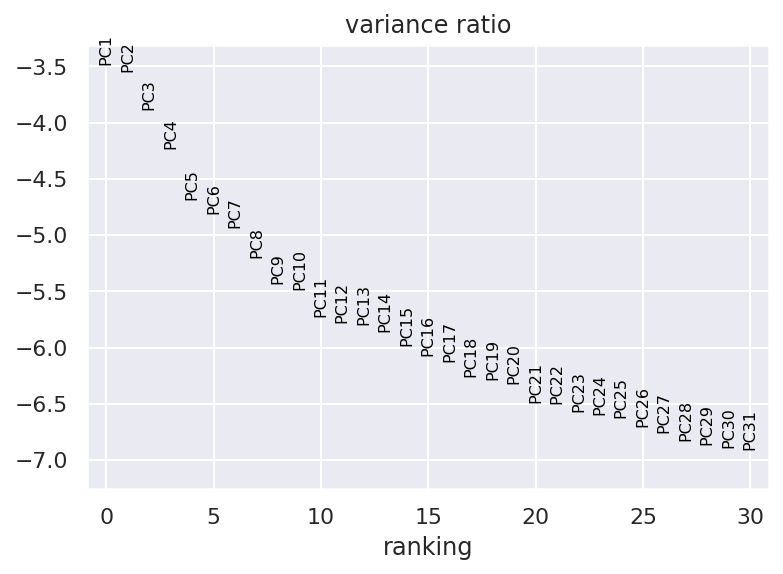

In [35]:
sc.tl.pca(integrated_adata, n_comps=50)
sc.pl.pca_variance_ratio(integrated_adata, log=True)


In [36]:
sc.pp.neighbors(integrated_adata, n_neighbors=15, n_pcs=40)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:02)


In [37]:
sc.tl.umap(integrated_adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:14:48)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


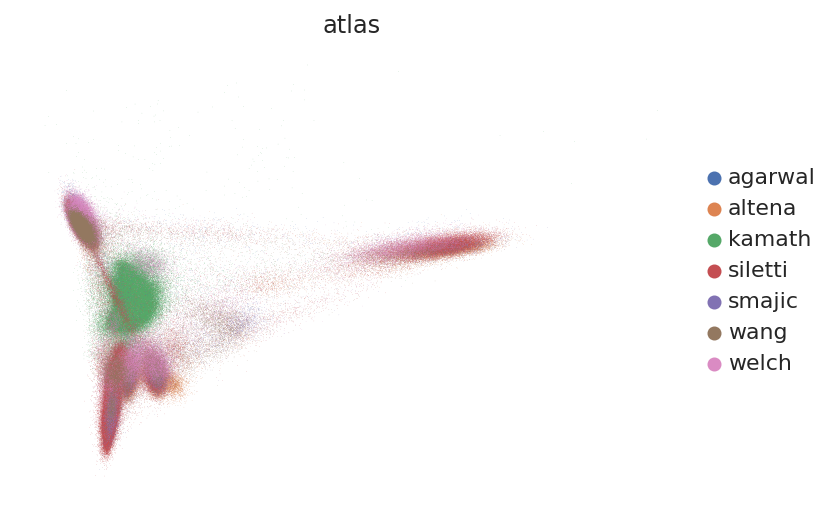

In [44]:
sc.pl.pca(integrated_adata, color = 'atlas')

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


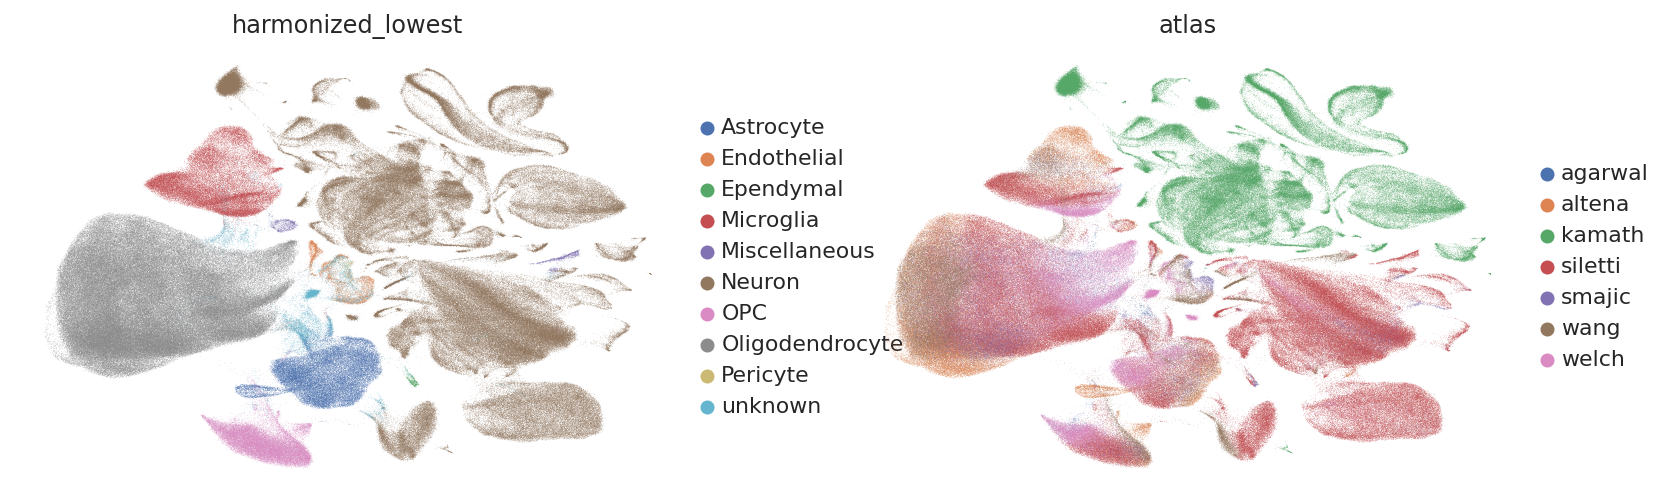

In [47]:
sc.pl.umap(integrated_adata, color = ['harmonized_lowest', 'atlas'])

In [53]:
print(np.isnan(integrated_adata.X).any())  # True if there are NaNs

False


In [52]:
# Convert all non-string columns in obs to strings
integrated_adata.obs = integrated_adata.obs.applymap(lambda x: str(x) if pd.notnull(x) else "NaN")

In [59]:
integrated_adata.X[np.isnan(integrated_adata.X)] = 0  # or any other imputation method


In [61]:
integrated_adata_subset = integrated_adata.copy()
# Use sc.pp.subsample to create a 10% random subset
sc.pp.subsample(integrated_adata_subset, fraction=0.10, random_state=42)

In [62]:
integrated_adata_subset.write('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/integrated_adata_subset.h5ad')